<a href="https://colab.research.google.com/github/Umeshtheru/green-hydrogen/blob/main/solar_forecast__1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal=sns.color_palette()
plt.style.use('fivethirtyeight')



In [37]:
df_NOV=pd.read_csv('/content/Nov.csv')
df_OCT=pd.read_csv('/content/oct.csv')
df_SEP=pd.read_csv('/content/Sept.csv')
df_AUG=pd.read_csv('/content/August.csv')
df_JULY=pd.read_csv('/content/July.csv')
df_JUN=pd.read_csv('/content/June.csv')

In [38]:
df=pd.concat([df_JUN, df_JULY,df_AUG,df_SEP,df_OCT,df_NOV], axis=0)
df=df.set_index('Timestamp')
df=df.drop(['IS2 WMS POA(W/m²)'],axis=1)
df.dropna()


,IS2 WMS GHI(W/m²)
Timestamp,
01-06-2023 00:00,0
01-06-2023 00:01,0
01-06-2023 00:02,0
01-06-2023 00:03,0
01-06-2023 00:04,0
...,...
30-11-2023 23:55,0.0
30-11-2023 23:56,0.0
30-11-2023 23:57,0.0


In [39]:
l=['-']
mask=df['IS2 WMS GHI(W/m²)'].isin(l)
df=df[~mask]


In [40]:
df.index = pd.to_datetime(df.index)


Train/Test Splite

In [41]:
train=df.loc[df.index<'20-11-2023']
test=df.loc[df.index>='20-11-2023']

#fig,ax=plt.subplot(figsize=(30,5))
#train.plot(ax=ax,lable='Training set')
#train.plot(ax=ax,lable='Test set')
#plt.show()
#df.loc[(df.index>'20-11-2023')&(df.index<'30-11-2023')]


<ipython-input-41-8422c61ab160>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train=df.loc[df.index<'20-11-2023']
<ipython-input-41-8422c61ab160>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  test=df.loc[df.index>='20-11-2023']


In [42]:
def create_feratures(df):
  df['min']=df.index.minute
  df['hour']=df.index.hour
  df['day_of _year']=df.index.day_of_year
  return df
df=create_feratures(df)

create model

In [ ]:
train=create_feratures(train)
test=create_feratures(test)
FEATURES=['min','hour','day_of _year']
TARGET=['IS2 WMS GHI(W/m²)']


In [44]:
X_train=train[FEATURES]
Y_train=train[TARGET]
X_test=test[FEATURES]
Y_test=test[TARGET]


In [45]:
X_train.reset_index(inplace=True)
X_train=X_train.drop(['Timestamp'],axis=1)
Y_train.reset_index(inplace=True)
Y_train=Y_train.drop(['Timestamp'],axis=1)
X_test.reset_index(inplace=True)
X_test=X_test.drop(['Timestamp'],axis=1)


In [46]:
Y_train=pd.to_numeric(Y_train['IS2 WMS GHI(W/m²)'])
Y_test=pd.to_numeric(Y_test['IS2 WMS GHI(W/m²)'])

In [47]:
model=xgb.XGBRegressor(n_estimators=20,early_stopping_rounds=50)
model.fit(X_train,Y_train,
          eval_set=[(X_train,Y_train),(X_test,Y_test)],
          verbose=True)

#model = XGBRegressor(n_estimators=20, max_depth=20, enable_categorical=True, verbosity=2)
#model.fit(X_train, Y_train)

[0]	validation_0-rmse:269.96196	validation_1-rmse:231.20363
[1]	validation_0-rmse:203.77077	validation_1-rmse:185.76426
[2]	validation_0-rmse:159.73421	validation_1-rmse:157.89029
[3]	validation_0-rmse:132.61304	validation_1-rmse:146.35025
[4]	validation_0-rmse:114.50154	validation_1-rmse:140.74139
[5]	validation_0-rmse:102.41048	validation_1-rmse:138.00699
[6]	validation_0-rmse:95.96170	validation_1-rmse:134.87898
[7]	validation_0-rmse:92.10700	validation_1-rmse:133.35422
[8]	validation_0-rmse:87.37607	validation_1-rmse:133.03486
[9]	validation_0-rmse:84.41674	validation_1-rmse:133.48135
[10]	validation_0-rmse:80.97780	validation_1-rmse:133.43063
[11]	validation_0-rmse:77.92219	validation_1-rmse:133.41837
[12]	validation_0-rmse:73.38336	validation_1-rmse:133.34422
[13]	validation_0-rmse:71.72333	validation_1-rmse:135.46670
[14]	validation_0-rmse:70.62637	validation_1-rmse:138.03137
[15]	validation_0-rmse:67.08886	validation_1-rmse:138.05350
[16]	validation_0-rmse:65.12967	validation_1

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [54]:
test['prediction']=model.predict(X_test)


In [49]:
score = np.sqrt(mean_squared_error(test['IS2 WMS GHI(W/m²)'],test['prediction']))
print(f'RMSE score on test set:{score:0.2f}')


RMSE score on test set:133.03


In [50]:
test=test.astype(float)

In [51]:
test['error']=((test['IS2 WMS GHI(W/m²)'])-(test['prediction']))
test['date']=test.index.date
test.groupby('date')['error'].mean()


date
2023-11-20   -100.913625
2023-11-21    -19.120129
2023-11-22    -66.411755
2023-11-23    -26.410677
2023-11-24    -26.456097
2023-11-25    -53.362969
2023-11-26    -31.806348
2023-11-27    -76.560997
2023-11-28    -40.016724
2023-11-29    -37.486208
2023-11-30    -22.681403
2023-12-06    156.038583
2023-12-07    154.355923
2023-12-08     89.360723
2023-12-09     87.597030
2023-12-10     48.288285
2023-12-11    -87.373212
Name: error, dtype: float64

In [52]:

A= (sum(test['IS2 WMS GHI(W/m²)'])-(sum(test['prediction'])))
B= sum(test['IS2 WMS GHI(W/m²)'])
C=(A/B)*100
C

-1.573456306038246

<Axes: xlabel='Timestamp'>

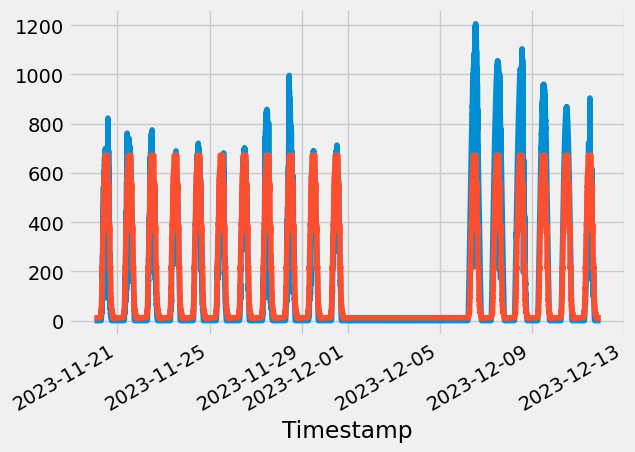

In [53]:
test['IS2 WMS GHI(W/m²)'].plot()
test['prediction'].plot()

